# Quantum Machine Learning Iris Dataset

In [1]:
!pip install qiskit pylatexenc qiskit_machine_learning

  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ | done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━

# Training a Quantum Model on a Iris Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from functools import reduce
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Exploratory Data Analysis

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# Membuat DataFrame dari dataset

import pandas as pd

iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Menambahkan kolom 'target' ke dalam DataFrame
iris_data['target'] = iris.target

In [6]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris_data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [8]:
iris_data.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
15,5.7,4.4,1.5,0.4,0
27,5.2,3.5,1.5,0.2,0
36,5.5,3.5,1.3,0.2,0
75,6.6,3.0,4.4,1.4,1
124,6.7,3.3,5.7,2.1,2
78,6.0,2.9,4.5,1.5,1
24,4.8,3.4,1.9,0.2,0
7,5.0,3.4,1.5,0.2,0
82,5.8,2.7,3.9,1.2,1
37,4.9,3.6,1.4,0.1,0


In [9]:
iris_data.shape

(150, 5)

In [10]:
# Dapatkan daftar jenis semua kolom di dataset
iris_data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [11]:
# Mencari tahu apakah dataset berisi nilai nol
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

# Data Visualization

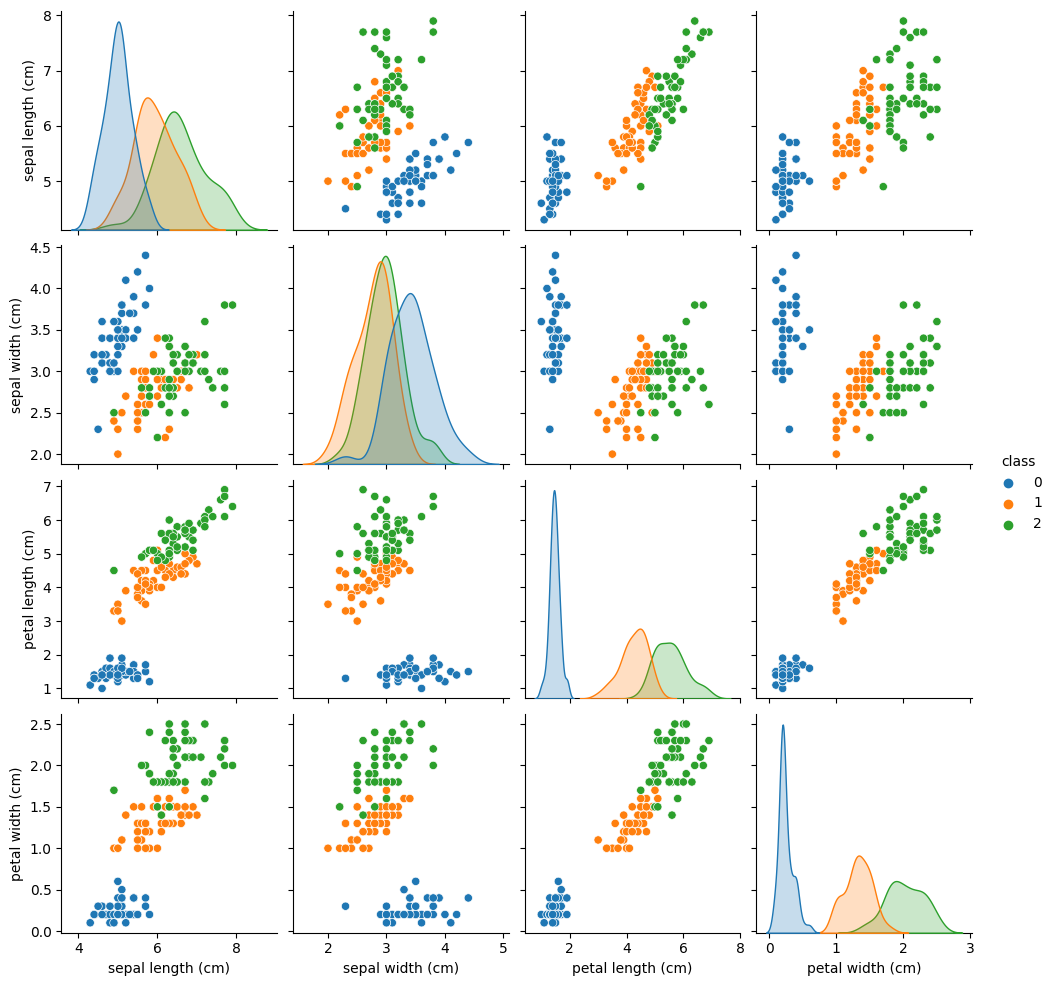

In [14]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["class"] = pd.Series(iris.target)

sns.pairplot(df, hue="class", palette="tab10")

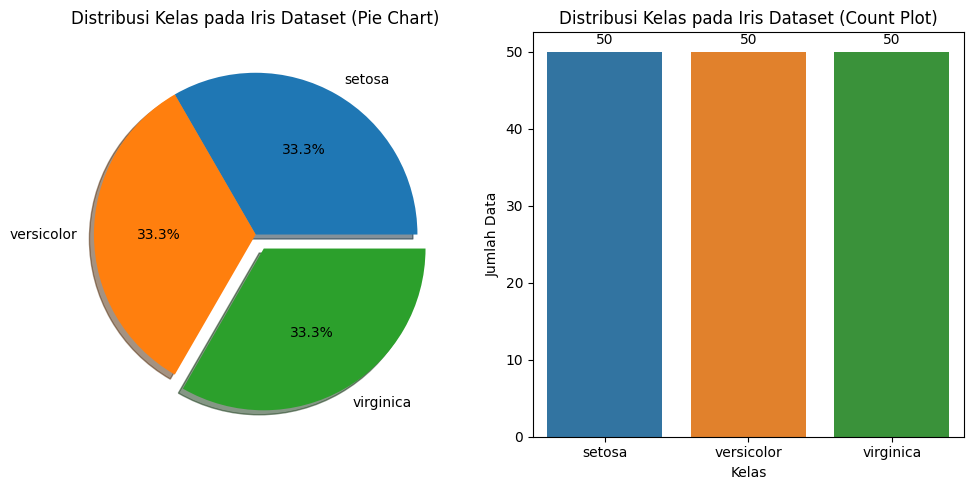

In [15]:
# Mengambil data target dari iris dataset
iris_target = iris.target

# Mendefinisikan label kelas
class_labels = iris.target_names

# Membuat figure
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart
iris_target_counts = [sum(iris_target == i) for i in range(len(class_labels))]
ax[0].pie(iris_target_counts, labels=class_labels, explode=[0, 0, 0.1], autopct='%1.1f%%', shadow=True)
ax[0].set_title('Distribusi Kelas pada Iris Dataset (Pie Chart)')

# Count plot
sns.countplot(x=iris_target, ax=ax[1])
ax[1].set_xticklabels(class_labels)
ax[1].set_title('Distribusi Kelas pada Iris Dataset (Count Plot)')
ax[1].set_xlabel('Kelas')
ax[1].set_ylabel('Jumlah Data')

# Menampilkan jumlah data untuk setiap target
target_counts = np.unique(iris_target, return_counts=True)[1]
for i, v in enumerate(target_counts):
    ax[1].text(i, v+1, str(v), ha='center')

plt.tight_layout()
plt.show()

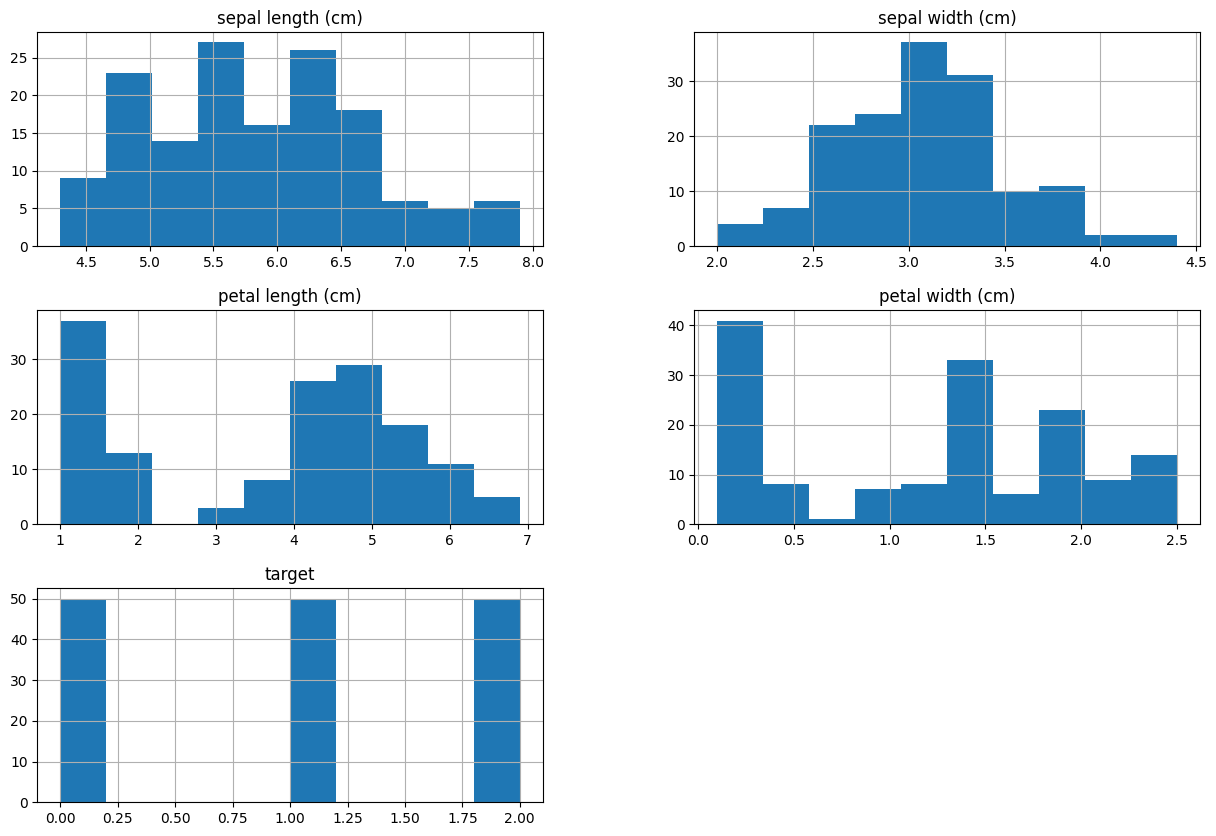

In [16]:
# Menampilkan distribusi setiap fitur menggunakan histogram
iris_data.hist(bins=10, figsize=(15,10))
plt.show()

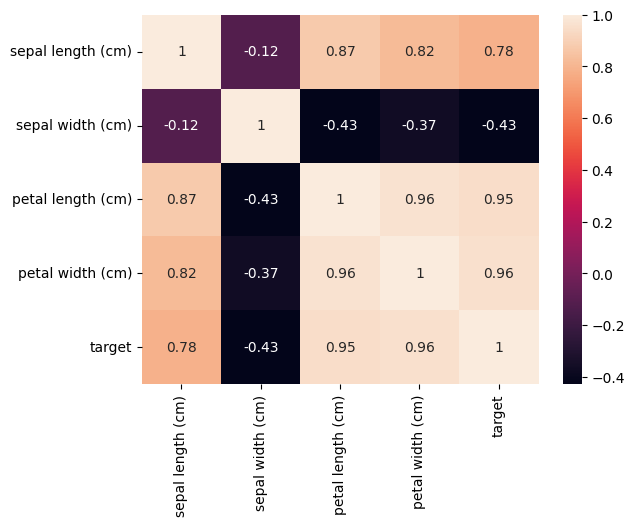

In [17]:
# Menampilkan korelasi antar fitur menggunakan heatmap
sns.heatmap(iris_data.corr(), annot=True)
plt.show()

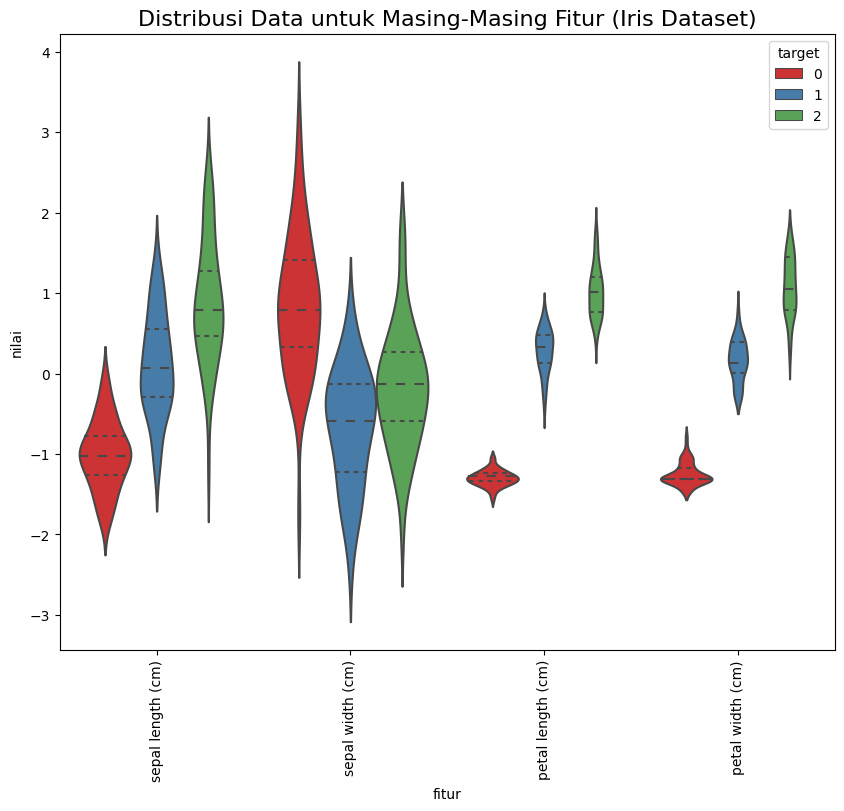

In [18]:
# Standarisasi fitur-fitur
data_std = (iris_data - iris_data.mean()) / iris_data.std()
data_std['target'] = iris_target

# Melt dataframe
data_melt = pd.melt(data_std, id_vars='target', var_name='fitur', value_name='nilai')

# Buat plot
plt.figure(figsize=(10, 8))
sns.violinplot(x='fitur', y='nilai',
               hue='target', data=data_melt,
               inner='quart', palette='Set1')
plt.xticks(rotation=90)
plt.title('Distribusi Data untuk Masing-Masing Fitur (Iris Dataset)', fontsize=16)
plt.show()

# Preprocessing Data

# Normalize

In [19]:
target_name = 'target'
labels_dataset = iris_data[target_name]
features_dataset = iris_data.drop(target_name, axis=1)

print("Features =\n", features_dataset)
print("labels =\n", labels_dataset)

Features =
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
labels =
 0      0
1      0


In [20]:
features_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
labels_dataset.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [22]:
from sklearn.preprocessing import MinMaxScaler

features_dataset = MinMaxScaler().fit_transform(features_dataset)

# Classic Machine Learning

In [23]:
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features_dataset, labels_dataset, train_size=0.8, random_state=algorithm_globals.random_seed
)

In [24]:
from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(train_features, train_labels)  # suppress printing the return value

In [25]:
train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.99
Classical SVC on the test dataset:     0.97


# Quantum Machine Learning

In [26]:
def data_map_eq9(x: np.ndarray) -> float:
    coeff = x[0] if len(x) == 1 else reduce(lambda m, n: (np.pi/2)*(m * n), 1 - x)
    return coeff

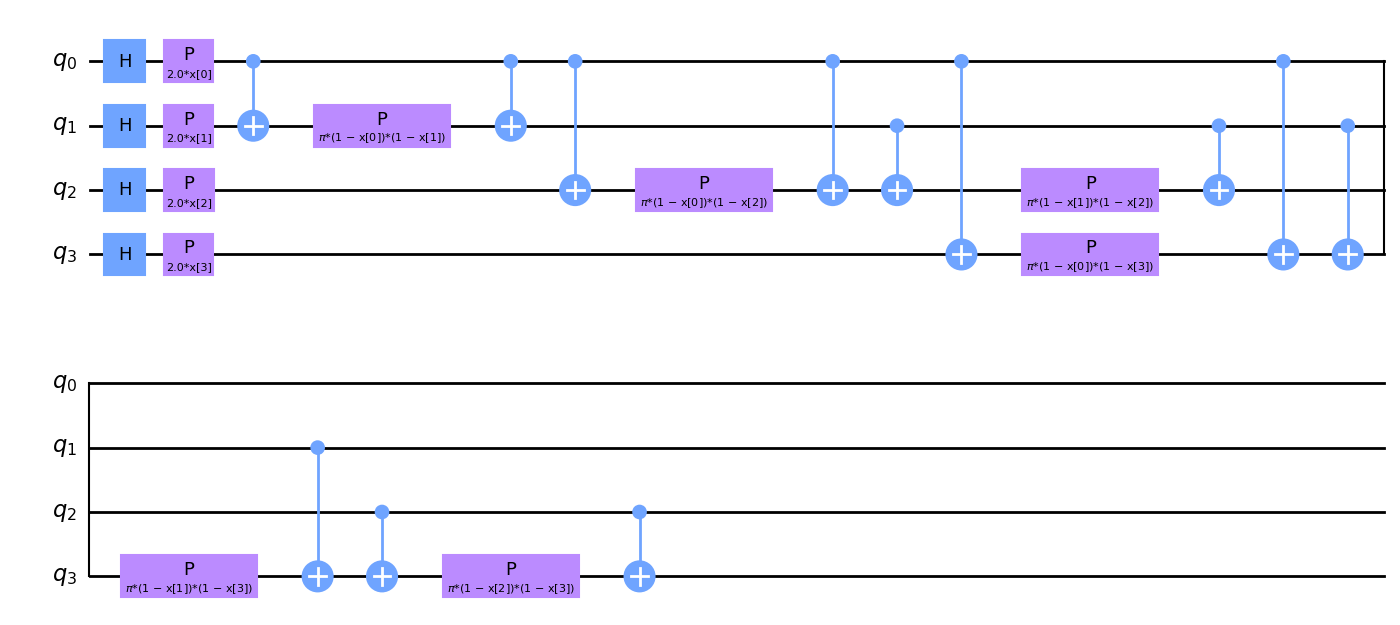

In [27]:
from qiskit.circuit.library import PauliFeatureMap

num_features = features_dataset.shape[1]

feature_map = PauliFeatureMap(feature_dimension=num_features, reps=1, data_map_func=data_map_eq9)
feature_map.decompose().draw(output="mpl", fold=20)

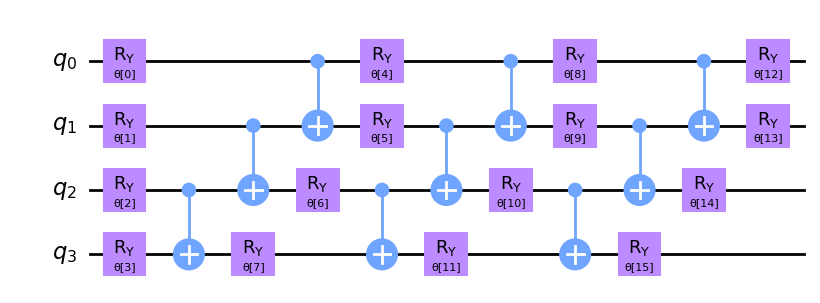

In [28]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [29]:
from qiskit.algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

In [30]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [31]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

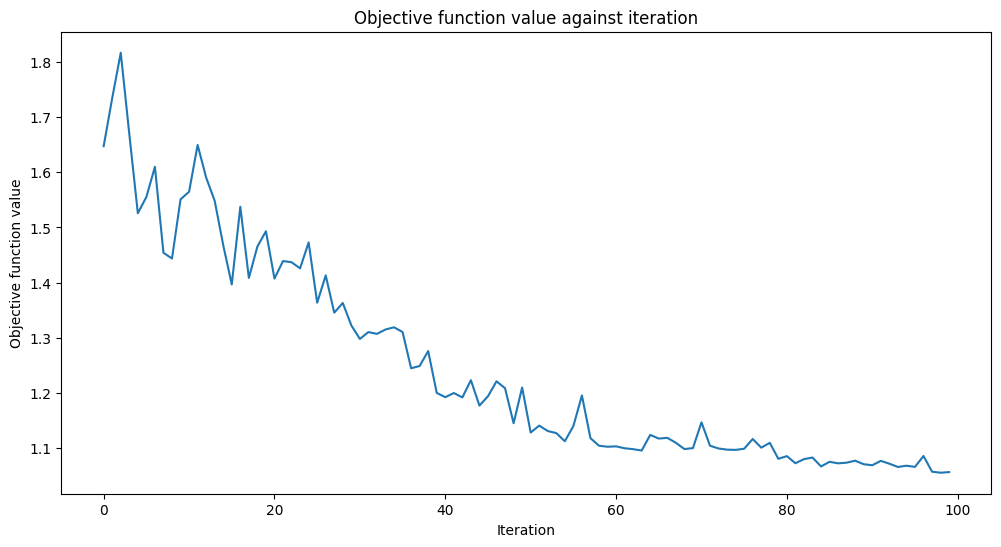

Training time: 151 seconds


In [32]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# Convert pandas Series to numpy arrays
train_features = np.array(train_features)
train_labels = np.array(train_labels)

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [33]:
train_score_q4_ra = vqc.score(train_features, train_labels)
test_score_q4_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC RealAmplitudes on the training dataset: {train_score_q4_ra:.2f}")
print(f"Quantum VQC RealAmplitudes on the test dataset:     {test_score_q4_ra:.2f}")

Quantum VQC RealAmplitudes on the training dataset: 0.84
Quantum VQC RealAmplitudes on the test dataset:     0.87


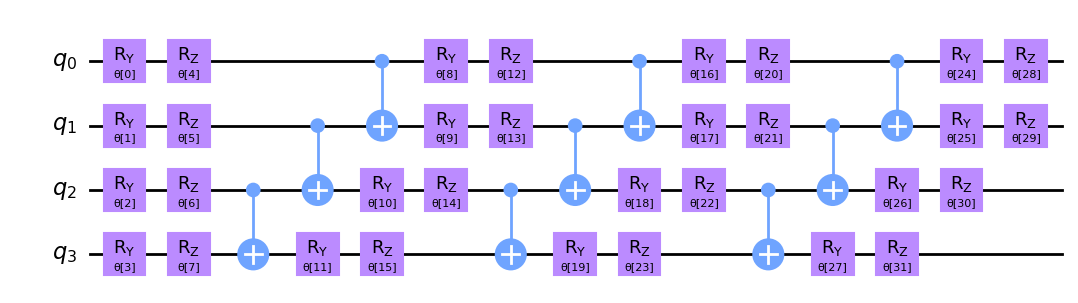

In [34]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

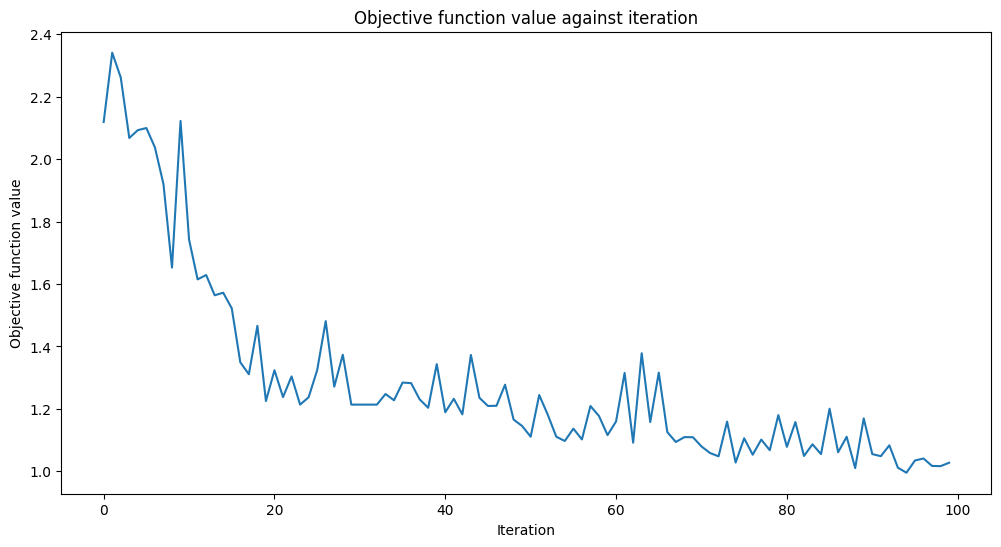

Training time: 201 seconds


In [35]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# Convert pandas Series to numpy arrays
train_features = np.array(train_features)
train_labels = np.array(train_labels)

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [36]:
train_score_q4_eff = vqc.score(train_features, train_labels)
test_score_q4_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC EfficientSU2 on the training dataset: {train_score_q4_eff:.2f}")
print(f"Quantum VQC EfficientSU2 on the test dataset:     {test_score_q4_eff:.2f}")

Quantum VQC EfficientSU2 on the training dataset: 0.97
Quantum VQC EfficientSU2 on the test dataset:     0.97


# Reducing the Number of Features With Principal Component Analysis (PCA)

<AxesSubplot: >

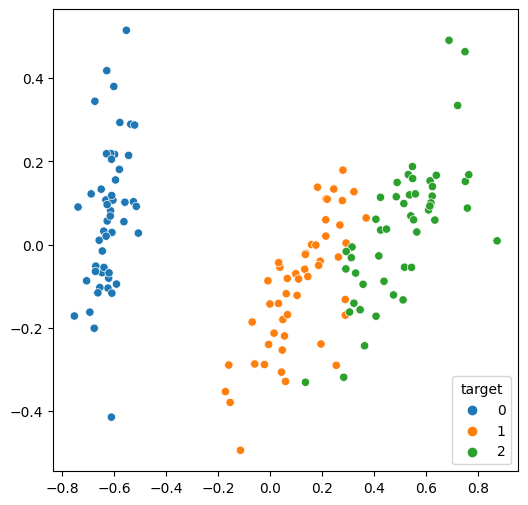

In [37]:
from sklearn.decomposition import PCA

features_dataset = PCA(n_components=2).fit_transform(features_dataset)

plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x=features_dataset[:, 0], y=features_dataset[:, 1], hue=labels_dataset, palette="tab10")

# Classic Machine Learning

In [38]:
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals
from sklearn.svm import SVC

algorithm_globals.random_seed = 123

train_features, test_features, train_labels, test_labels = train_test_split(
    features_dataset, labels_dataset, train_size=0.8, random_state=algorithm_globals.random_seed
)

svc.fit(train_features, train_labels)

train_score_c2 = svc.score(train_features, train_labels)
test_score_c2 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c2:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c2:.2f}")

Classical SVC on the training dataset: 0.97
Classical SVC on the test dataset:     0.90


# Quantum Machine Learning

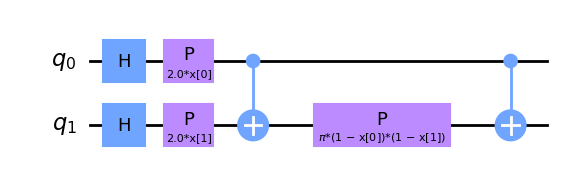

In [39]:
from qiskit.circuit.library import PauliFeatureMap

num_features = features_dataset.shape[1]

feature_map = PauliFeatureMap(feature_dimension=num_features, reps=1, data_map_func=data_map_eq9)
feature_map.decompose().draw(output="mpl", fold=20)

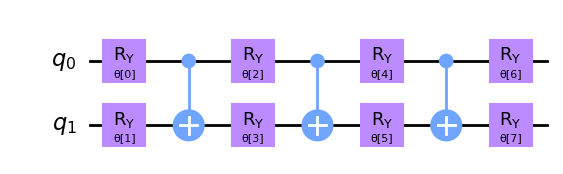

In [40]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [41]:
from qiskit.algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

In [42]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [43]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

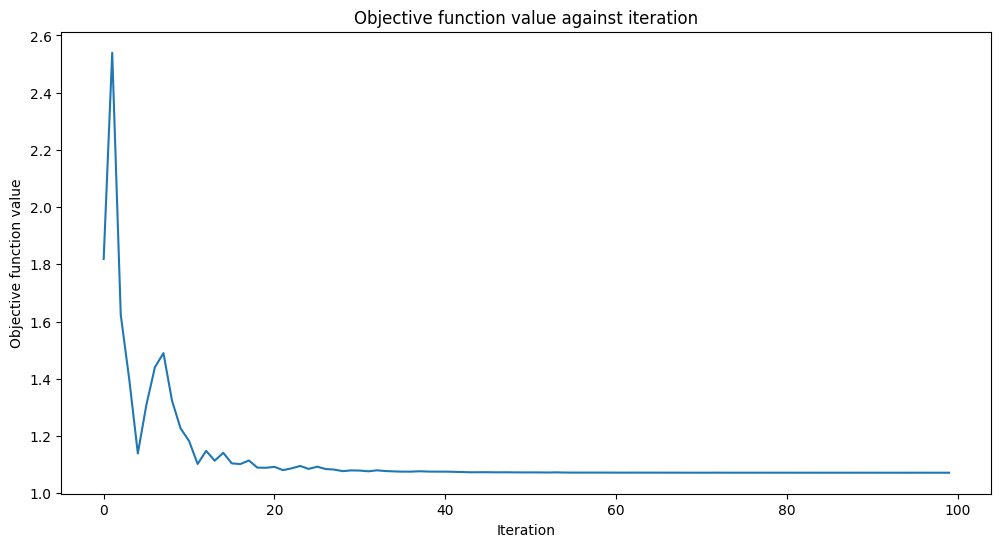

Training time: 80 seconds


In [44]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# Convert pandas Series to numpy arrays
train_features = np.array(train_features)
train_labels = np.array(train_labels)

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [45]:
train_score_q2_ra = vqc.score(train_features, train_labels)
test_score_q2_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.66
Quantum VQC on the test dataset using RealAmplitudes:     0.73


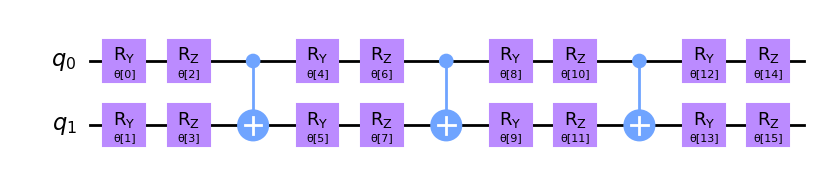

In [46]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

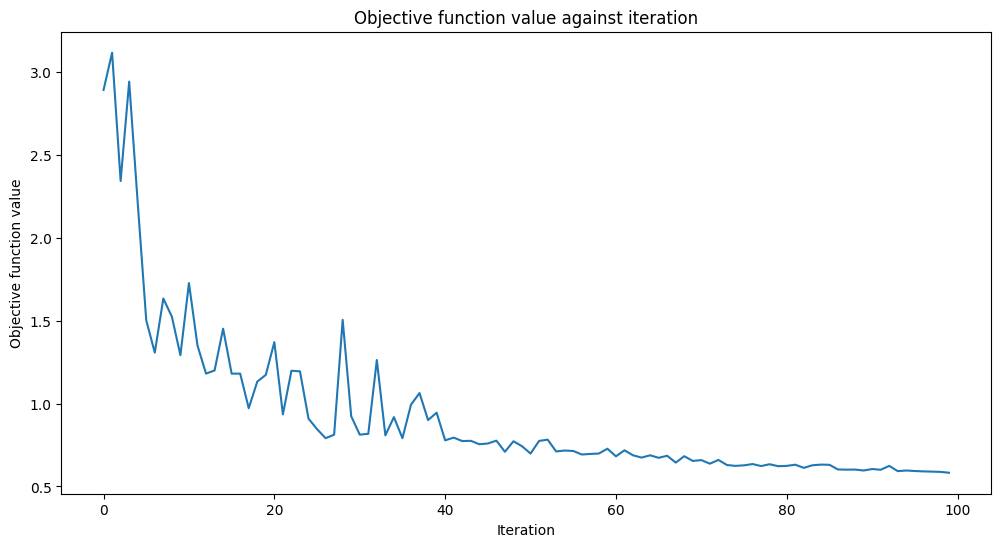

Training time: 96 seconds


In [47]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# Convert pandas Series to numpy arrays
train_features = np.array(train_features)
train_labels = np.array(train_labels)

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [48]:
train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.86
Quantum VQC on the test dataset using EfficientSU2:     0.90


In [49]:
print(f"Model                           | Train Score | Test Score")
print(f"SVC, 4 features                 | {train_score_c4:11.2f} | {test_score_c4:10.2f}")
print(f"VQC, 4 features, RealAmplitudes | {train_score_q4_ra:11.2f} | {test_score_q4_ra:10.2f}")
print(f"VQC, 4 features, EfficientSU2   | {train_score_q4_eff:11.2f} | {test_score_q4_eff:10.2f}")
print(f"----------------------------------------------------------")
print(f"SVC, 2 features                 | {train_score_c2:11.2f} | {test_score_c2:10.2f}")
print(f"VQC, 2 features, RealAmplitudes | {train_score_q2_ra:11.2f} | {test_score_q2_ra:10.2f}")
print(f"VQC, 2 features, EfficientSU2   | {train_score_q2_eff:11.2f} | {test_score_q2_eff:10.2f}")

Model                           | Train Score | Test Score
SVC, 4 features                 |        0.99 |       0.97
VQC, 4 features, RealAmplitudes |        0.84 |       0.87
VQC, 4 features, EfficientSU2   |        0.97 |       0.97
----------------------------------------------------------
SVC, 2 features                 |        0.97 |       0.90
VQC, 2 features, RealAmplitudes |        0.66 |       0.73
VQC, 2 features, EfficientSU2   |        0.86 |       0.90
